### Create the base graph by combining all the original graphs 

In [2]:
import os
from cell import utils, graph_utils

In [3]:
project_name = "NPP_GNN_project"
roi = "VISp"
layers = utils.get_npp_visp_layers()

### Read all the original edgelists

In [4]:
dic = {}

for layer in layers:
    edgelist_filename = "original_edges.csv"
    edgelist_dir = utils.get_edgelist_dir(roi, project_name, layer)
    edge_list = pd.read_csv(os.path.join(edgelist_dir , edgelist_filename), 
                            index_col="Unnamed: 0")
    
    edge_list['source'] = edge_list['source'].astype(str)
    edge_list['target'] = edge_list['target'].astype(str)
    dic[layer] = edge_list

### Align all the edgelists

In [5]:
from functools import reduce
alldf = reduce(lambda x, y: pd.merge(x, y, 
                                     how='outer', 
                                     on=['source', 'target']), dic.values())
alldf.columns = ['source', 'target'] + ["w"+str(i) for i in range(len(layers))]
alldf.head()

,source,target,w0,w1,w2,w3,w4,w5,w6,w7,...,w27,w28,w29,w30,w31,w32,w33,w34,w35,w36
0,0,2,0.000184,NaN,NaN,NaN,NaN,0.003966,0.020624,NaN,...,0.037283,0.001289,0.007366,NaN,0.001983,NaN,NaN,NaN,NaN,NaN
1,0,9,0.001643,NaN,NaN,NaN,NaN,0.038296,0.024122,NaN,...,0.042214,0.001291,0.008486,NaN,0.001986,NaN,NaN,NaN,NaN,NaN
2,0,11,0.000324,NaN,NaN,NaN,NaN,0.055905,0.029749,NaN,...,0.031796,0.004867,0.004492,NaN,0.007487,NaN,NaN,NaN,NaN,NaN
3,0,13,0.096124,NaN,NaN,NaN,NaN,0.001785,0.017338,NaN,...,0.037481,0.039776,0.002550,NaN,0.061193,NaN,NaN,NaN,NaN,NaN
4,0,36,0.000667,NaN,NaN,NaN,NaN,0.000718,0.000820,NaN,...,0.001436,0.006665,NaN,NaN,0.010254,NaN,NaN,NaN,NaN,NaN


### sum all the weight columns

In [6]:
alldf["weight"] = alldf[["w"+str(i) for i in range(len(layers))]].sum(axis=1, skipna = True)

In [7]:
alldf = alldf[['source', 'target', 'weight']]

In [8]:
alldf.source

0        0
1        0
2        0
3        0
4        0
        ..
8508    88
8509    14
8510    15
8511    86
8512    15
Name: source, Length: 8513, dtype: object

### Save edgelist

In [9]:
layer = "base_unnormalized_allcombined"
edgelist_filename = "edges.csv"
edgelist_dir = utils.get_edgelist_dir(roi, project_name, layer)
if not os.path.isdir(edgelist_dir):
    os.mkdir(edgelist_dir)     
alldf.to_csv(os.path.join(edgelist_dir , edgelist_filename))

### Add the self connection

In [10]:
alldf_selfconnected = graph_utils.fix_self_connection(alldf, weighted=True)
    
edgelist_filename = "selfconnection_added_edges.csv"
edgelist_dir = utils.get_edgelist_dir(roi, project_name, layer)
if not os.path.isdir(edgelist_dir):
    os.mkdir(edgelist_dir)     
alldf_selfconnected.to_csv(os.path.join(edgelist_dir , edgelist_filename))

In [11]:
alldf_selfconnected.shape

(8515, 3)

In [12]:
alldf.shape

(8513, 3)

In [23]:
alldf

,source,target,weight
0,0,2,0.959233
1,0,9,1.165541
2,0,11,0.896152
3,0,13,0.577894
4,0,36,0.278507
...,...,...,...
8508,88,32,0.027586
8509,14,32,0.009419
8510,15,32,0.038961
8511,86,32,0.281690


In [14]:
missing = 0 
missing_n = []
nodes = (graph_utils.get_node_from_edgelist(alldf))
for i in nodes:
        if (alldf[(alldf['source'] == str(i))
                                    & (alldf['target'] == str(i))].empty):
            missing_n.append(i)
            missing += 1

In [15]:
missing

2

In [16]:
missing_n

['21', '32']

In [22]:
alldf[(alldf.source=='4')]

,source,target,weight
1799,4,1,0.437232
1800,4,2,0.504707
1801,4,3,0.444062
1802,4,4,0.498042
1803,4,5,0.529087
...,...,...,...
8070,4,39,0.157634
8071,4,40,0.111628
8072,4,73,0.283140
8073,4,80,0.256575


In [19]:
alldf_selfconnected[(alldf_selfconnected.source=="32") & (alldf_selfconnected.target=="32")]

,source,target,weight
8514,32,32,0.000004


In [51]:
cldf = utils.read_visp_npp_cldf()
cldf.head()

Reading cldf from: //Users/fahimehb/Documents/NPP_GNN_project/dat/cl_df_VISp_annotation.csv


,dendcluster_id,cluster_label,colors,cluster_color,subclass_id,subclass_label,subclass_color,class_id,class_label,class_color
cluster_id,,,,,,,,,,
0,1,L2/3 IT VISp Rrad,#D9F077,#D9F077,7,L2/3 IT,#94D9A1,2,Glutamatergic,#27AAE1
1,2,L2/3 IT VISp Adamts2,#A6E6A9,#A6E6A9,7,L2/3 IT,#94D9A1,2,Glutamatergic,#27AAE1
2,3,L2/3 IT VISp Agmat,#7AE6AB,#7AE6AB,7,L2/3 IT,#94D9A1,2,Glutamatergic,#27AAE1
3,7,L4 IT VISp Rspo1,#00979D,#00979D,8,L4,#00979D,2,Glutamatergic,#27AAE1
4,8,L5 IT VISp Hsd11b1 Endou,#00DDC5,#00DDC5,9,L5 IT,#008A61,2,Glutamatergic,#27AAE1


In [63]:
df = alldf_selfconnected.pivot(index='source',columns='target', values= "weight")
df = df.loc[[str(i) for i in range(93)]]
df = df[[str(i) for i in range(93)]]
label = cldf.loc[df.index.tolist()]['cluster_label'].tolist()
df.index = label
df.columns = label

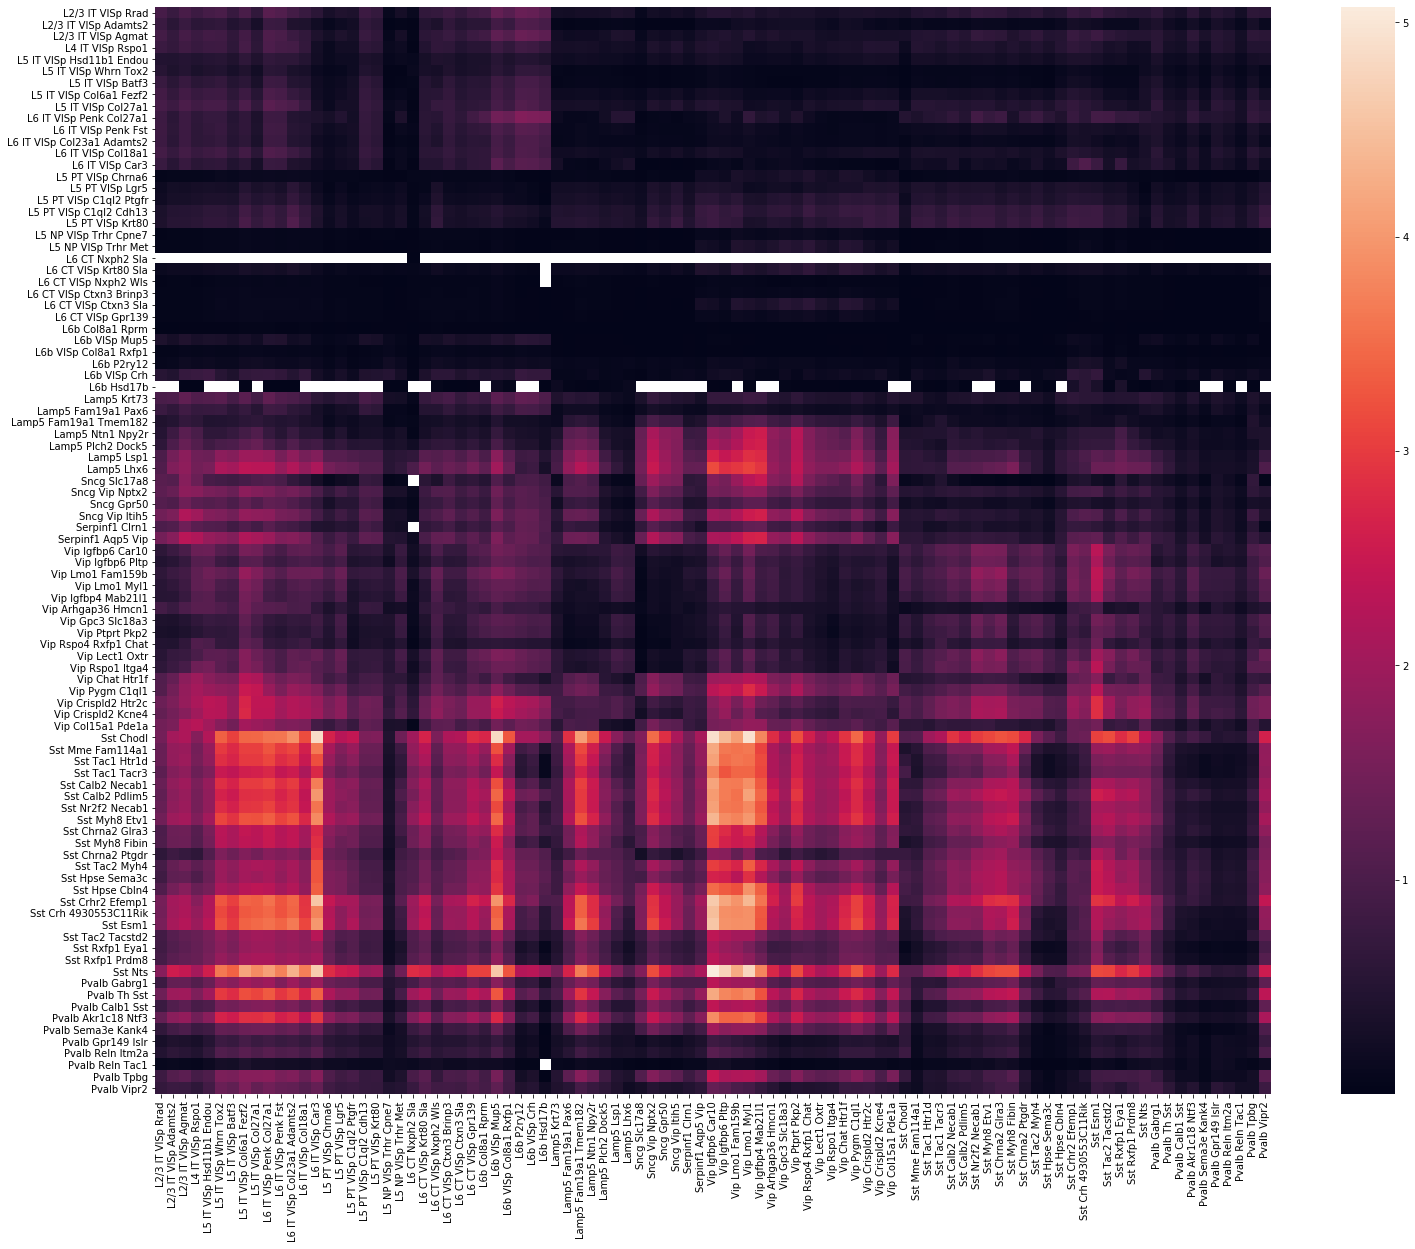

In [72]:
import seaborn as sns

fig = plt.figure(figsize=(25,20))

ax = sns.heatmap(df)
ax.tick_params(labelsize=10)


In [73]:
fig.savefig("/Users/fahimehb/Documents/NPP_GNN_project/dat/fig/base_graph.png", dpi=750)

In [36]:
alldf[(alldf.source == "0") & (alldf.target=="0")]

,source,target,weight
3431,0,0,0.936187


### Remove source nodes from edgelist

In [107]:
new_edgelist = graph_utils.remove_nodes_from_edglist(alldf_selfconnected, ["21", "32"])

layer = "base_unnormalized_allcombined"

edgelist_filename = "selfconnection_added_edges_node21_32_removed.csv"

edgelist_dir = utils.get_edgelist_dir(roi, project_name, layer)

new_edgelist.to_csv(os.path.join(edgelist_dir , edgelist_filename))

In [106]:
edgelist_dir

'//Users/fahimehb/Documents/NPP_GNN_project/dat/edgelists/VISp/base_unnormalized_allcombined'